In [1]:
import os
import seaborn as sns
import pandas as pd
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
import matplotlib.pyplot as plt
plt.style.use(['science'])

--

### Collect results and process 

data collection and generating one csv

In [13]:
path = "../../data/coevolution_res/finer"
grid_res = list()
means = list()
alls = dict()
for filename in os.listdir(path):
        if filename.endswith('report.csv'):
            df = pd.read_csv(os.path.join(path,filename), index_col = 0)
            #filename = filename.replace('comm_rate','commrate').replace('shared_discount','shareddiscount')
            for h in filename[:-4].split("-")[1:]:
                field = h.split("_")[0]
                val = h.split("_")[-1]
                try: 
                    val = float(val)
                except:
                    pass
                df[field]= val  
            df['travel_decisions'] = df.travel_decisions.apply(lambda x: x.split("\n")[1:-1])
            df['travel_decisions'] = df['travel_decisions'].apply(lambda x: dict([(_.split(" ")[0],int(_.split(" ")[-1])) for _ in x]))
            df['out'] = df.travel_decisions.apply(lambda x: x.get('out',0))
            df['rh'] = df.travel_decisions.apply(lambda x: x.get('rh',0))
            df['rp'] = df.travel_decisions.apply(lambda x: x.get('rp',0))
            df['filename'] = filename.split("/")[-1]
            df.columns = [_.replace("_"," ") for _ in df.columns]
        
            means.append(df[df.day>=(df.day.max()-5)].mean())
            grid_res.append(df)
            alls[filename] = df
            
means = pd.concat(means, axis = 1).T.reset_index()
grid_res = pd.concat(grid_res)
grid_res.nV=grid_res.nV.astype(int)
grid_res.nP=grid_res.nP.astype(int)
means.nV=means.nV.astype(int)
means.nP=means.nP.astype(int)
means['share out'] = means['out']/means.nP
means['share rh'] = means['rh']/means.nP
means['share rp'] = means['rp']/means.nP
means['share drivers'] = means['n drivers']/means.nV
grid_res['$c$'] = grid_res['comm rate']
grid_res['$p$'] = grid_res['discount']
means['$c$'] = means['comm rate'].round(2)
means['$p$'] = means['discount'].round(2)
best_ones = means.groupby(['nP','nV']).commision.idxmax()
means['best_one'] = means.apply(lambda x: True if x.name in best_ones.values else False, axis = 1)
df.head()

,day,nP,nV,comm rate,discount,travel decisions,n trav,n drivers,fare,commision,...,n actually sharing,n shared rides,unserved,comm,shared,dt,out,rh,rp,filename
0,0,700.0,50.0,0.5,0,"{'out': 411, 'rh': 289}",289,50,0.000,0.000,...,0,0,0,0.5,0.0,report,411,289,0,FINER-nP_700-nV_50-comm_rate_0.5-shared_discou...
1,1,700.0,50.0,0.5,0,"{'out': 432, 'rh': 268}",268,10,0.000,0.000,...,0,0,27,0.5,0.0,report,432,268,0,FINER-nP_700-nV_50-comm_rate_0.5-shared_discou...
2,2,700.0,50.0,0.5,0,"{'out': 504, 'rh': 196}",196,12,1217.818,928.179,...,0,0,0,0.5,0.0,report,504,196,0,FINER-nP_700-nV_50-comm_rate_0.5-shared_discou...
3,3,700.0,50.0,0.5,0,"{'out': 551, 'rh': 149}",149,5,930.958,746.109,...,0,0,27,0.5,0.0,report,551,149,0,FINER-nP_700-nV_50-comm_rate_0.5-shared_discou...
4,4,700.0,50.0,0.5,0,"{'out': 586, 'rh': 114}",114,6,677.334,456.498,...,0,0,3,0.5,0.0,report,586,114,0,FINER-nP_700-nV_50-comm_rate_0.5-shared_discou...


In [14]:
means.sample(5)

,index,day,nP,nV,comm rate,discount,n trav,n drivers,fare,commision,...,out,rh,rp,share out,share rh,share rp,share drivers,$c$,$p$,best_one
245,245,196.5,300,30,0.9,0.1,126.166667,11.500000,769.012533,186.492833,...,173.833333,44.333333,81.833333,0.579444,0.147778,0.272778,0.383333,0.9,0.1,False
893,893,196.5,500,60,0.5,0.3,168.333333,10.166667,869.490300,433.221833,...,331.666667,63.500000,104.833333,0.663333,0.127000,0.209667,0.169444,0.5,0.3,False
784,784,136.5,100,30,0.9,0.1,35.500000,6.000000,202.172133,50.617933,...,64.500000,10.833333,24.666667,0.645000,0.108333,0.246667,0.200000,0.9,0.1,False
31,31,196.5,300,40,0.9,0.1,126.000000,12.333333,772.727667,184.475900,...,174.000000,44.833333,81.166667,0.580000,0.149444,0.270556,0.308333,0.9,0.1,False
233,233,196.5,500,10,1.1,0.2,158.333333,9.666667,851.879933,24.149533,...,341.666667,56.833333,101.500000,0.683333,0.113667,0.203000,0.966667,1.1,0.2,False


In [3]:
means.to_csv('means.csv')

---
### Best platform setting

maximize commision



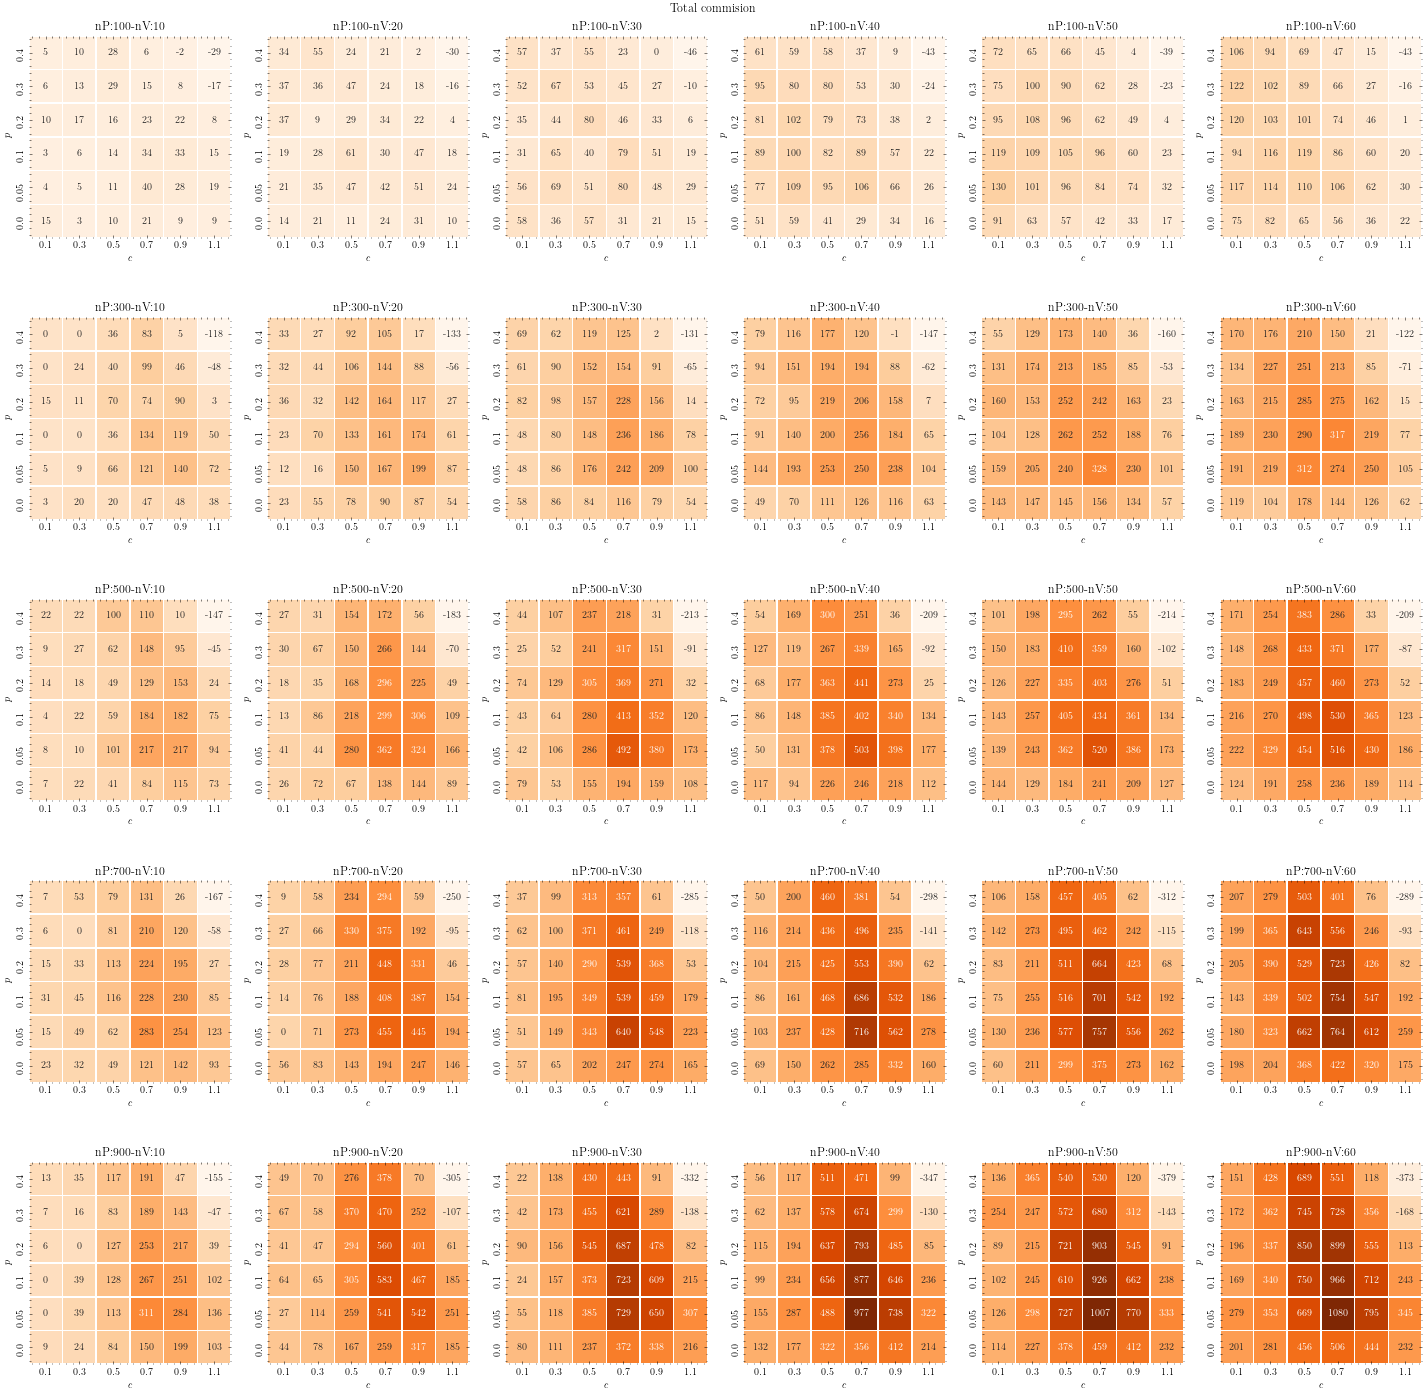

In [4]:
df = means
fig, ax = plt.subplots(means.nP.nunique(),means.nV.nunique(),figsize = (20,20))
ax = ax.flatten()
i = 0
for nP in pd.Series(means.nP.unique()).sort_values().values:
    for nV in pd.Series(means.nV.unique()).sort_values().values:
        mtx = df[(df.nP == nP) & (df.nV ==nV)].groupby(['$p$', '$c$'])[['commision']].max().unstack().round(0).sort_index(ascending = False)
        mtx.columns = mtx.columns.get_level_values(1)
        mtx = mtx.fillna(-999).astype(int)
        sns.heatmap(mtx, annot=True, fmt = 'd', cmap='Oranges', ax = ax[i], square = True, cbar = False, center = 300, linewidths = 0.5)
        ax[i].set_title('nP:{}-nV:{}'.format(nP,nV))
        i+=1 
fig.suptitle('Total commision')
fig.tight_layout()

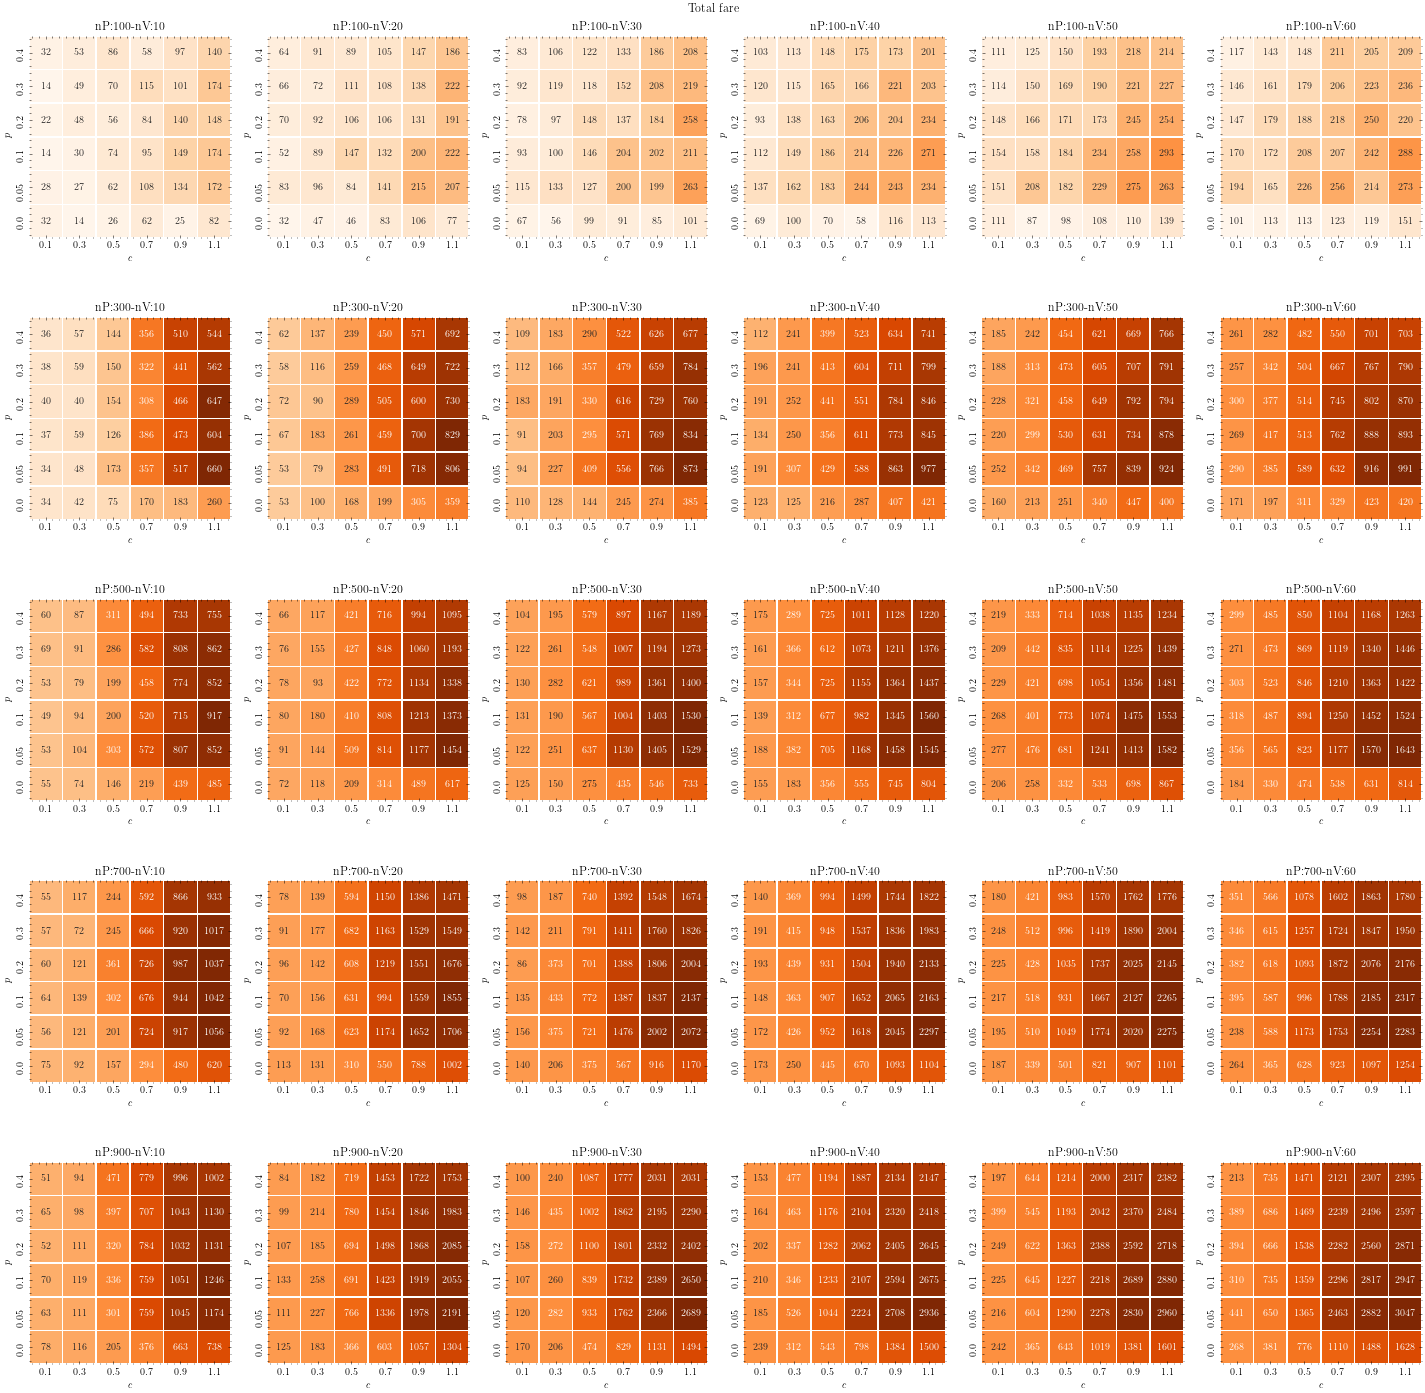

In [5]:
df = means
fig, ax = plt.subplots(means.nP.nunique(),means.nV.nunique(),figsize = (20,20))
ax = ax.flatten()
i = 0
for nP in pd.Series(means.nP.unique()).sort_values().values:
    for nV in pd.Series(means.nV.unique()).sort_values().values:
        mtx = df[(df.nP == nP) & (df.nV ==nV)].groupby(['$p$', '$c$'])[['fare']].max().unstack().round(0).sort_index(ascending = False)
        mtx.columns = mtx.columns.get_level_values(1)
        mtx = mtx.fillna(-999).astype(int)
        sns.heatmap(mtx, annot=True, fmt = 'd', cmap='Oranges', ax = ax[i], square = True, cbar = False, center = 300, linewidths = 0.5)
        ax[i].set_title('nP:{}-nV:{}'.format(nP,nV))
        i+=1 
fig.suptitle('Total fare')
fig.tight_layout()

---

### Mode choice 

(travellers split between alternative modes)

Text(0.5, 0.98, 'number of users')

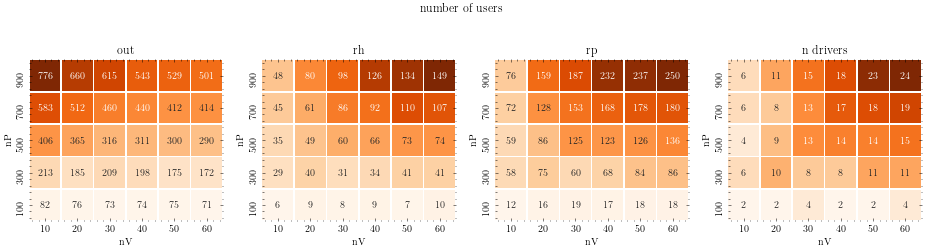

In [6]:
fig, ax = plt.subplots(1,4,figsize = (16,4))
for i, m in enumerate(['out','rh','rp','n drivers']):
    mtx = means[means.best_one].groupby(['nP','nV'])[m].max().unstack().round(0).sort_index(ascending = False).astype(int)
    sns.heatmap(mtx, annot=True, fmt = 'd', cmap='Oranges', ax = ax[i], square = True, cbar = False, linewidths = 0.5)
    ax[i].set_title(m)
fig.suptitle('number of users')

Text(0.5, 0.98, 'shares')

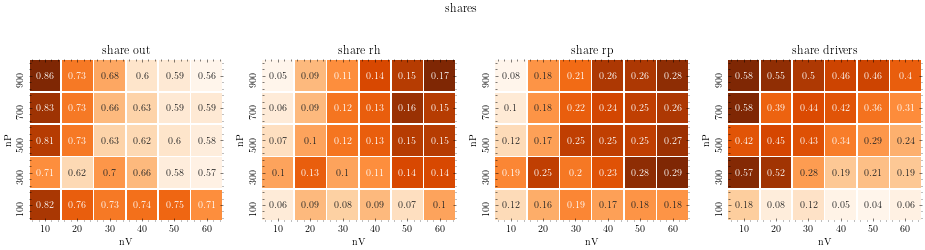

In [7]:
fig, ax = plt.subplots(1,4,figsize = (16,4))
for i, m in enumerate(['share out','share rh','share rp','share drivers']):
    mtx = means[means.best_one].groupby(['nP','nV'])[m].max().unstack().round(2).sort_index(ascending = False)
    sns.heatmap(mtx, annot=True, cmap='Oranges', ax = ax[i], square = True, cbar = False, linewidths = 0.5)
    ax[i].set_title(m)
fig.suptitle('shares')

--- 
### KPIs

other indicators

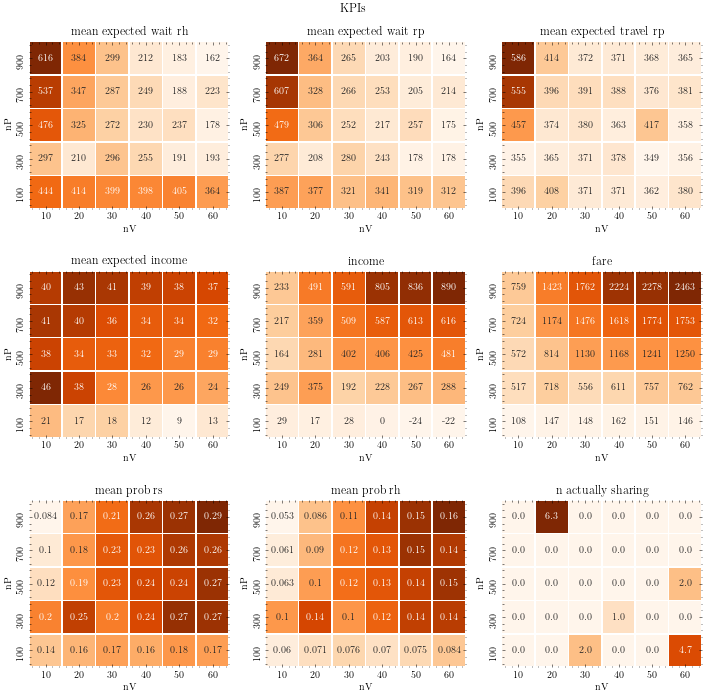

In [8]:
cols = ['mean expected wait rh','mean expected wait rp','mean expected travel rp',
        'mean expected income','income', 'fare', 
        'mean prob rs','mean prob rh', 'n actually sharing' ]
fig, ax = plt.subplots(3,3,figsize = (10,10))
ax = ax.flatten()
for i, col in enumerate(cols):
    if i <6:
        mtx = means[means.best_one].groupby(['nP','nV'])[col].mean().unstack().round(0).sort_index(ascending = False).astype(int)
        sns.heatmap(mtx, annot=True, fmt = 'd', cmap='Oranges', ax = ax[i], square = True, cbar = False, linewidths = 0.5)
    else:
        mtx = means[means.best_one].groupby(['nP','nV'])[col].mean().unstack().round(3).sort_index(ascending = False)
        sns.heatmap(mtx, annot=True, fmt = ".2", cmap='Oranges', ax = ax[i], square = True, cbar = False, linewidths = 0.5)
        
    ax[i].set_title(col)
fig.suptitle('KPIs')
fig.tight_layout()


--- 
### Pooling

number of travellers actually sharing

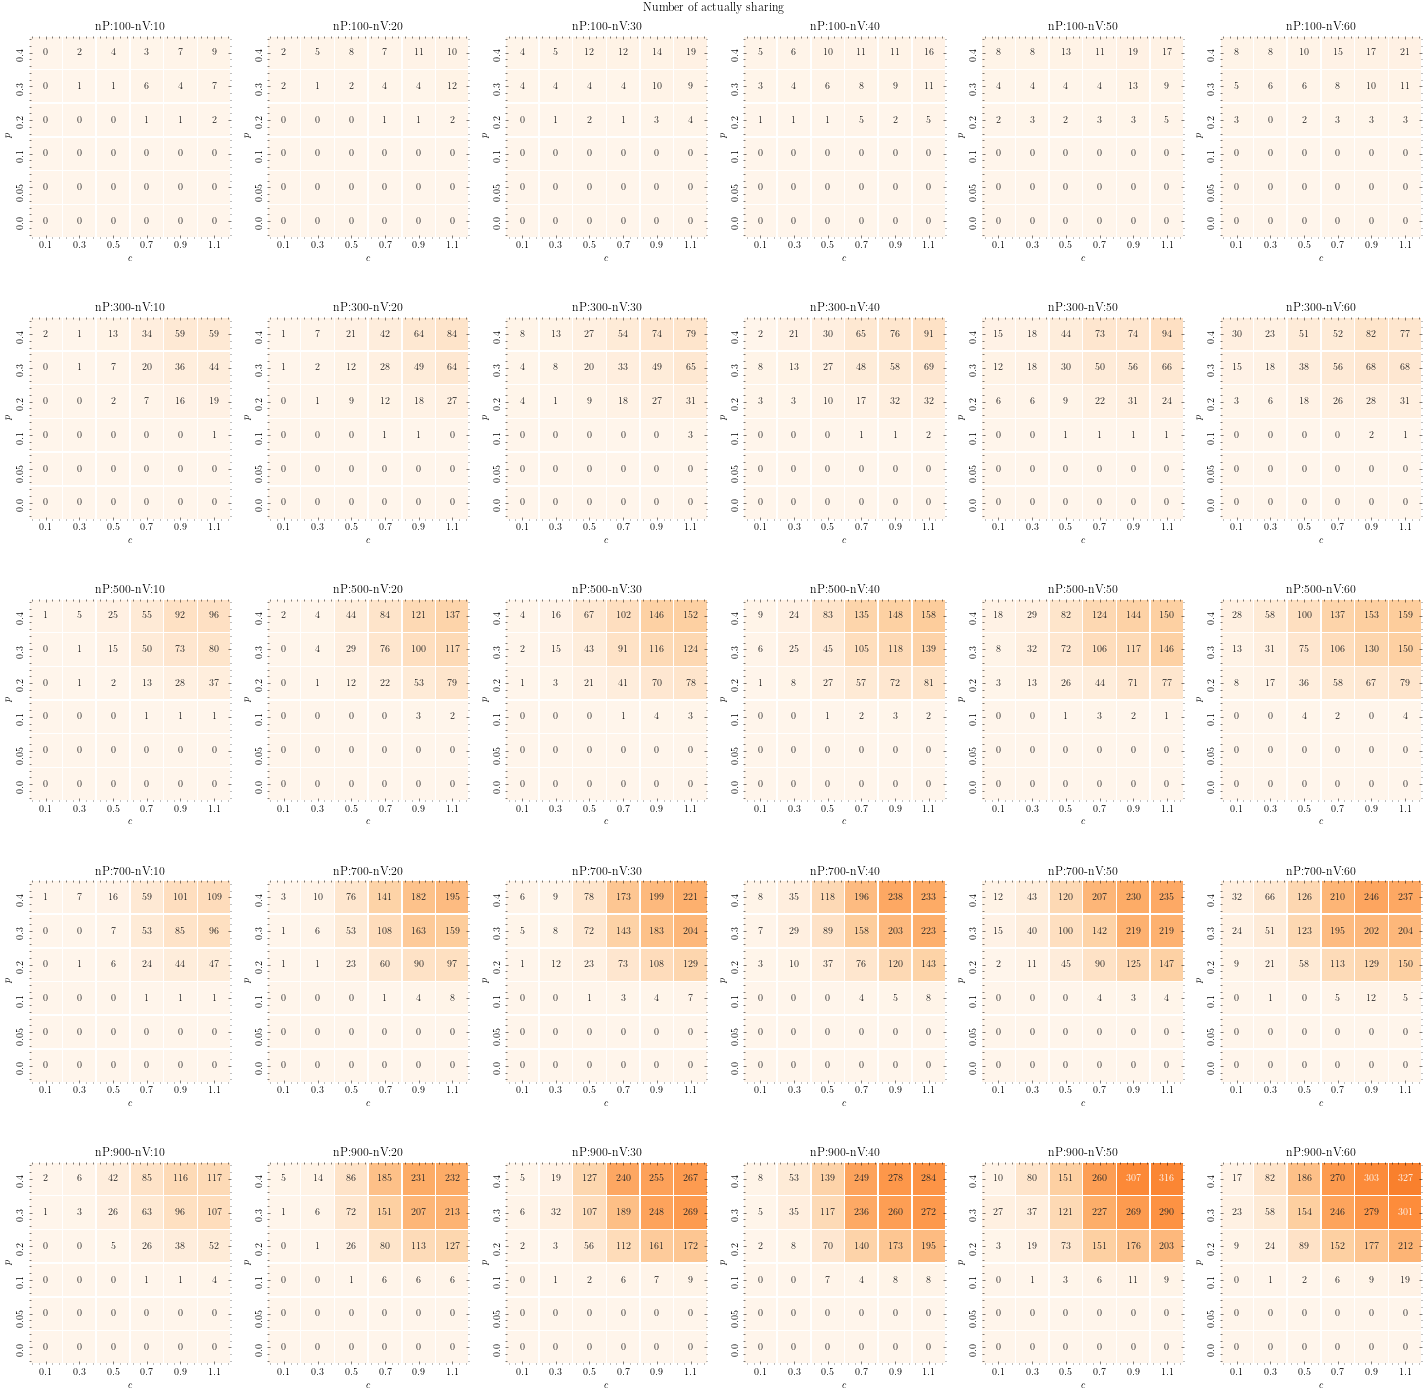

In [9]:
df = means
fig, ax = plt.subplots(means.nP.nunique(),means.nV.nunique(),figsize = (20,20))
ax = ax.flatten()
i = 0
for nP in pd.Series(means.nP.unique()).sort_values().values:
    for nV in pd.Series(means.nV.unique()).sort_values().values:
        mtx = df[(df.nP == nP) & (df.nV ==nV)].groupby(['$p$', '$c$'])[['n actually sharing']].max().unstack().round(0).sort_index(ascending = False)
        mtx.columns = mtx.columns.get_level_values(1)
        mtx = mtx.fillna(-999).astype(int)
        sns.heatmap(mtx, annot=True, fmt = 'd', cmap='Oranges', ax = ax[i], square = True, cbar = False, center = 300, linewidths = 0.5)
        ax[i].set_title('nP:{}-nV:{}'.format(nP,nV))
        i+=1 
fig.suptitle('Number of actually sharing')
fig.tight_layout()

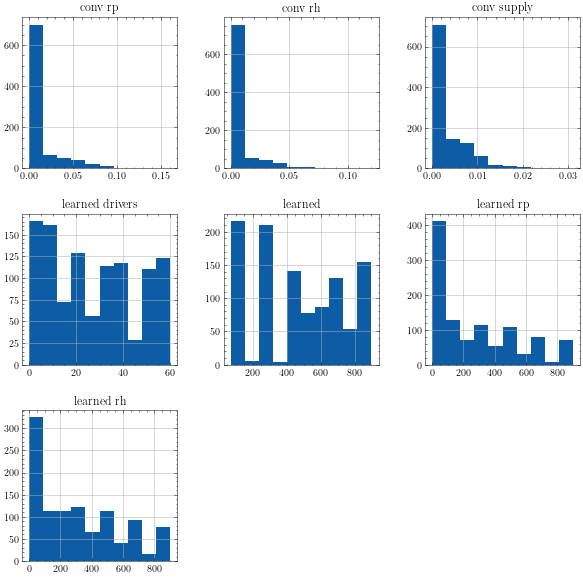

In [10]:
import numpy as np
means['conv rh'] = means['conv rh'].replace([np.inf, -np.inf], np.nan)
_ = means[['conv rp', 'conv rh', 'conv supply','learned drivers','learned','learned rp','learned rh']].hist(figsize= (10,10))

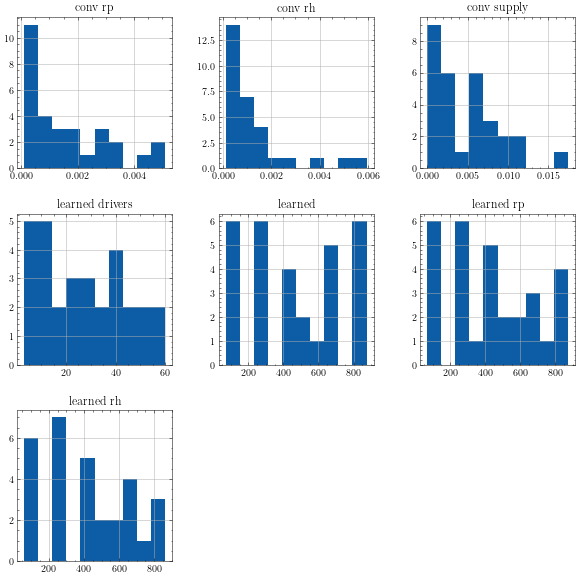

In [11]:
_ = means[means['best_one']][['conv rp', 'conv rh', 'conv supply','learned drivers','learned','learned rp','learned rh']].hist(figsize= (10,10))